<a href="https://colab.research.google.com/github/FelipeFerAl/TAM-2025-2/blob/main/ClassExercises/DeepLearning2_FunctionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialization

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Importar todas las librerias necesarias instalando RAPIDS en el entorno Colab
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

clear_output()

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

Xtrain, ytrain = train
Xtrain = Xtrain/255
Xtest, ytest = test
Xtest = Xtest/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


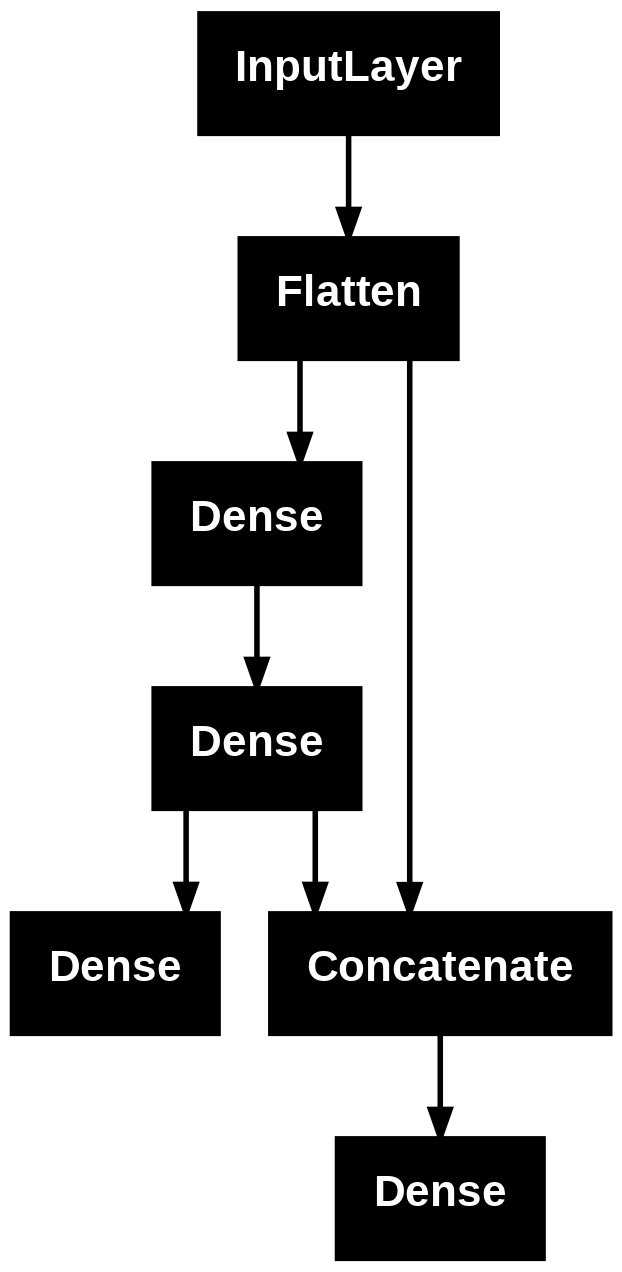

In [4]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [5]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy

In [6]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.4982 - outputA_accuracy: 0.7286 - outputA_loss: 0.8054 - outputB_accuracy: 0.7613 - outputB_loss: 0.6928 - val_loss: 0.8322 - val_outputA_accuracy: 0.8493 - val_outputA_loss: 0.4234 - val_outputB_accuracy: 0.8514 - val_outputB_loss: 0.4079
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8045 - outputA_accuracy: 0.8542 - outputA_loss: 0.4082 - outputB_accuracy: 0.8557 - outputB_loss: 0.3963 - val_loss: 0.7866 - val_outputA_accuracy: 0.8563 - val_outputA_loss: 0.3965 - val_outputB_accuracy: 0.8562 - val_outputB_loss: 0.3898
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7040 - outputA_accuracy: 0.8713 - outputA_loss: 0.3568 - outputB_accuracy: 0.8744 - outputB_loss: 0.3472 - val_loss: 0.7171 - val_outputA_accuracy: 0.8694 - val_outputA_loss: 0.3636 - val_outputB_accuracy: 0.8724 - val_outputB_loss: 0.3523
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6620 - outputA_accuracy: 0.8792 

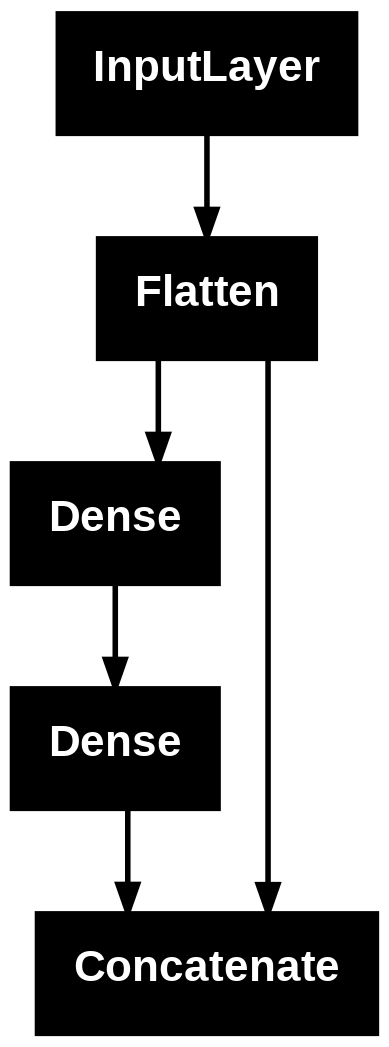

In [7]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

In [8]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 834)

# Dimension reduction with PCA

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
  fig, ax = plt.subplots(figsize=(16,10))
  for i in range(Z.shape[0]):
    #print('img',i+1,'/',Z.shape[0])
    image = images[i].reshape((img_w, img_h))
    im = OffsetImage(image, zoom=zoom,cmap=cmap)
    ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
    ax.add_artist(ab)
    ax.update_datalim([(Z[i,0], Z[i,1])])
    ax.autoscale()

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

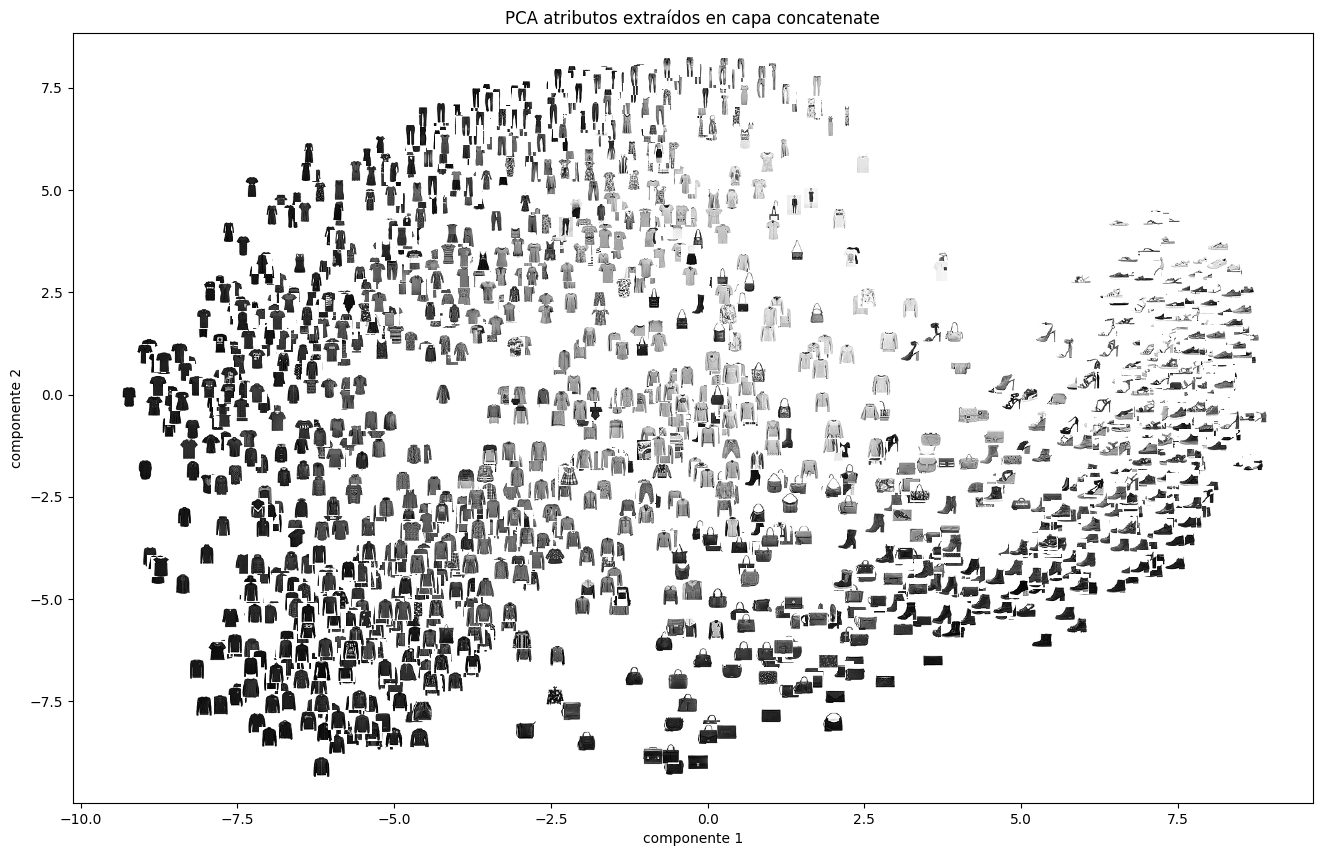

In [ ]:
Ni = 2000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')

## Using UMAP

In [ ]:
from cuml.manifold import UMAP
import cudf

umap_model = UMAP(n_components=2, n_neighbors=10)
embedding = umap_model.fit_transform(z)

Text(0.5, 1.0, 'UMAP atributos extraídos en capa concatenate')

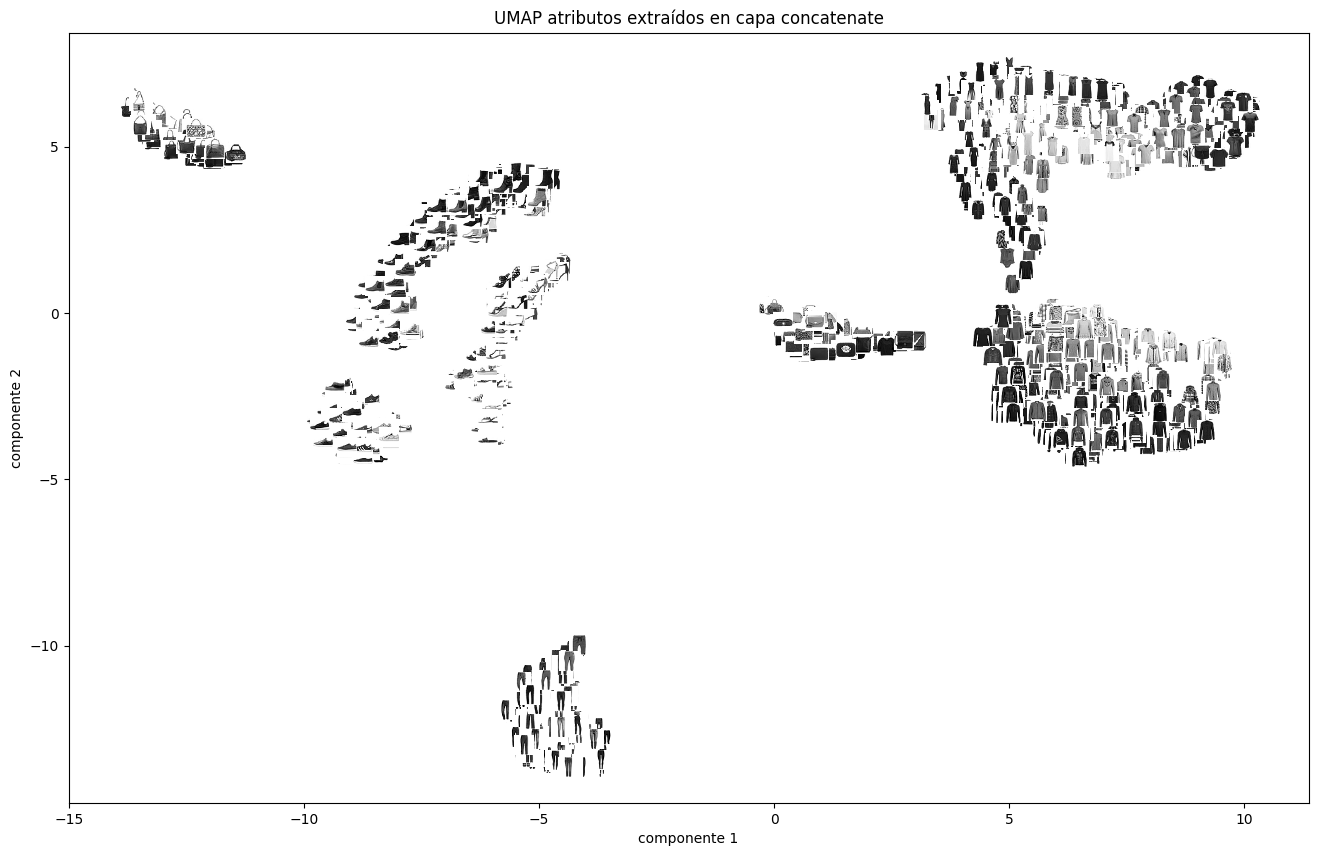

In [ ]:
Ni = 2000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(embedding[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('UMAP atributos extraídos en capa concatenate')

# New architecture with CNNs

In [9]:
def noisy_images(x_train, x_test, var):
  """
  Esta función toma los datos de train y test
  y genera un subset con imágenes ruidosas.
  Entrada: Conjunto de train y test original
  Salida: Conjunto de train y test ruidoso
  """
  ruido = np.random.normal(0, var, x_train.shape)
  ruido2 = np.random.normal(0, var, x_test.shape)
  train = np.clip(x_train + ruido, 0, 1)
  test = np.clip(x_test + ruido2, 0, 1)
  return train, test

def pair_label(y_train, y_test):
  """
  Esta función toma las etiquetas de train y test
  y genera otras etiquetas para clasificación
  binaria en base a número par/impar.
  Entrada: Conjunto de etiquetas originales
  Salida: Etiquetas binarias
  """
  y_train2 = np.where(y_train % 2, 0, 1)
  y_test2 = np.where(y_test % 2, 0, 1)
  return y_train2, y_test2

### Functional Network

In [10]:
# Carga de la base de datos original
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de los datos
x_train = x_train/255
x_test = x_test/255

# Creación de los subsets con ruido
x_train2, x_test2 = noisy_images(x_train, x_test, 0.01)
x_train3, x_test3 = noisy_images(x_train, x_test, 0.25)

# Creación de las etiquetas binarias
y_train2, y_test2 = pair_label(y_train, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


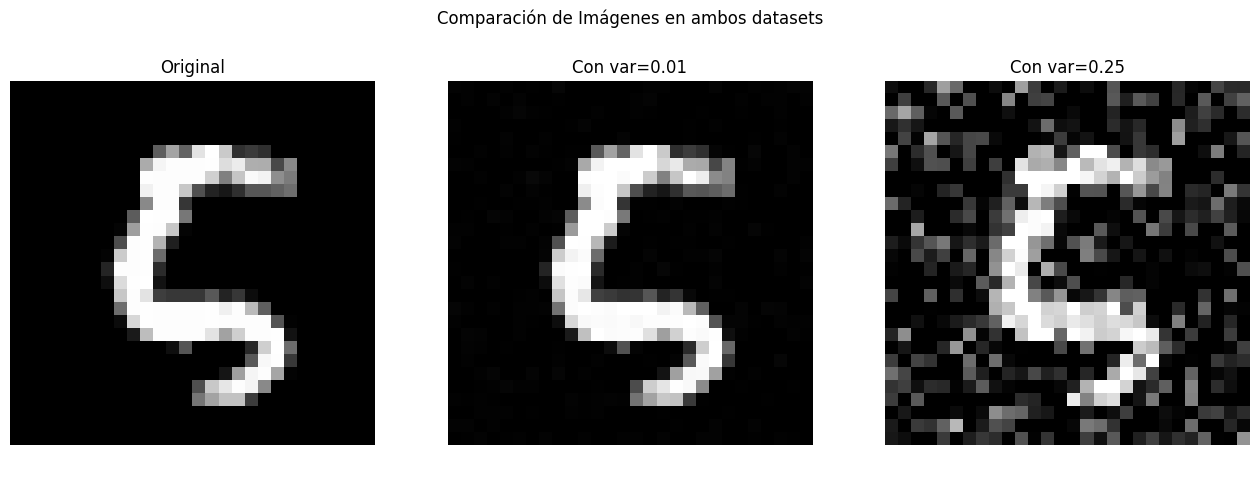

In [23]:
idx = 2000
plt.figure(figsize=(16,6)), plt.title('Comparación de Imágenes en ambos datasets'), plt.axis("off")
plt.subplot(1,3,1), plt.imshow(x_train[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(x_train2[idx], cmap="gray"), plt.title("Con var=0.01"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(x_train3[idx], cmap="gray"), plt.title("Con var=0.25"), plt.axis("off")
plt.show()

In [74]:
input_1 = tf.keras.layers.Input(shape=(x_train.shape[1],x_train.shape[2], 1), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(x_train.shape[1],x_train.shape[2], 1), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(x_train.shape[1],x_train.shape[2], 1), name='entrada_3')

concat = tf.keras.layers.concatenate([input_1,input_2,input_3])
cnn1 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(concat)
cnn2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(cnn1)
pool = tf.keras.layers.MaxPooling2D((2,2))(cnn2)
flatten = tf.keras.layers.Flatten()(pool)

linea1 = tf.keras.layers.Dense(128,activation='relu',name='linea1')(flatten)
linea2 = tf.keras.layers.Dense(64,activation='relu',name='linea2')(linea1)

output1 = tf.keras.layers.Dense(10,activation="softmax",name='output1')(linea2)
output2 = tf.keras.layers.Dense(1,activation="sigmoid",name='output2')(linea2)

model = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output1, output2])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada_1           │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_2           │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_3           │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 28, 28, 3) │          0 │ entrada_1[0][0],  │
│ (Concatenate)       │                   │            │ entrada_2[0][0],  │
│                     │                   │            │ entrada_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 28, 28,    │      1,792 │ concatenate_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 28, 28,    │     18,464 │ conv2d_18[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 14, 14,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 6272)      │          0 │ max_pooling2d_13… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linea1 (Dense)      │ (None, 128)       │    802,944 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linea2 (Dense)      │ (None, 64)        │      8,256 │ linea1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 10)        │        650 │ linea2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 1)         │         65 │ linea2[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 832,171 (3.17 MB)

 Trainable params: 832,171 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

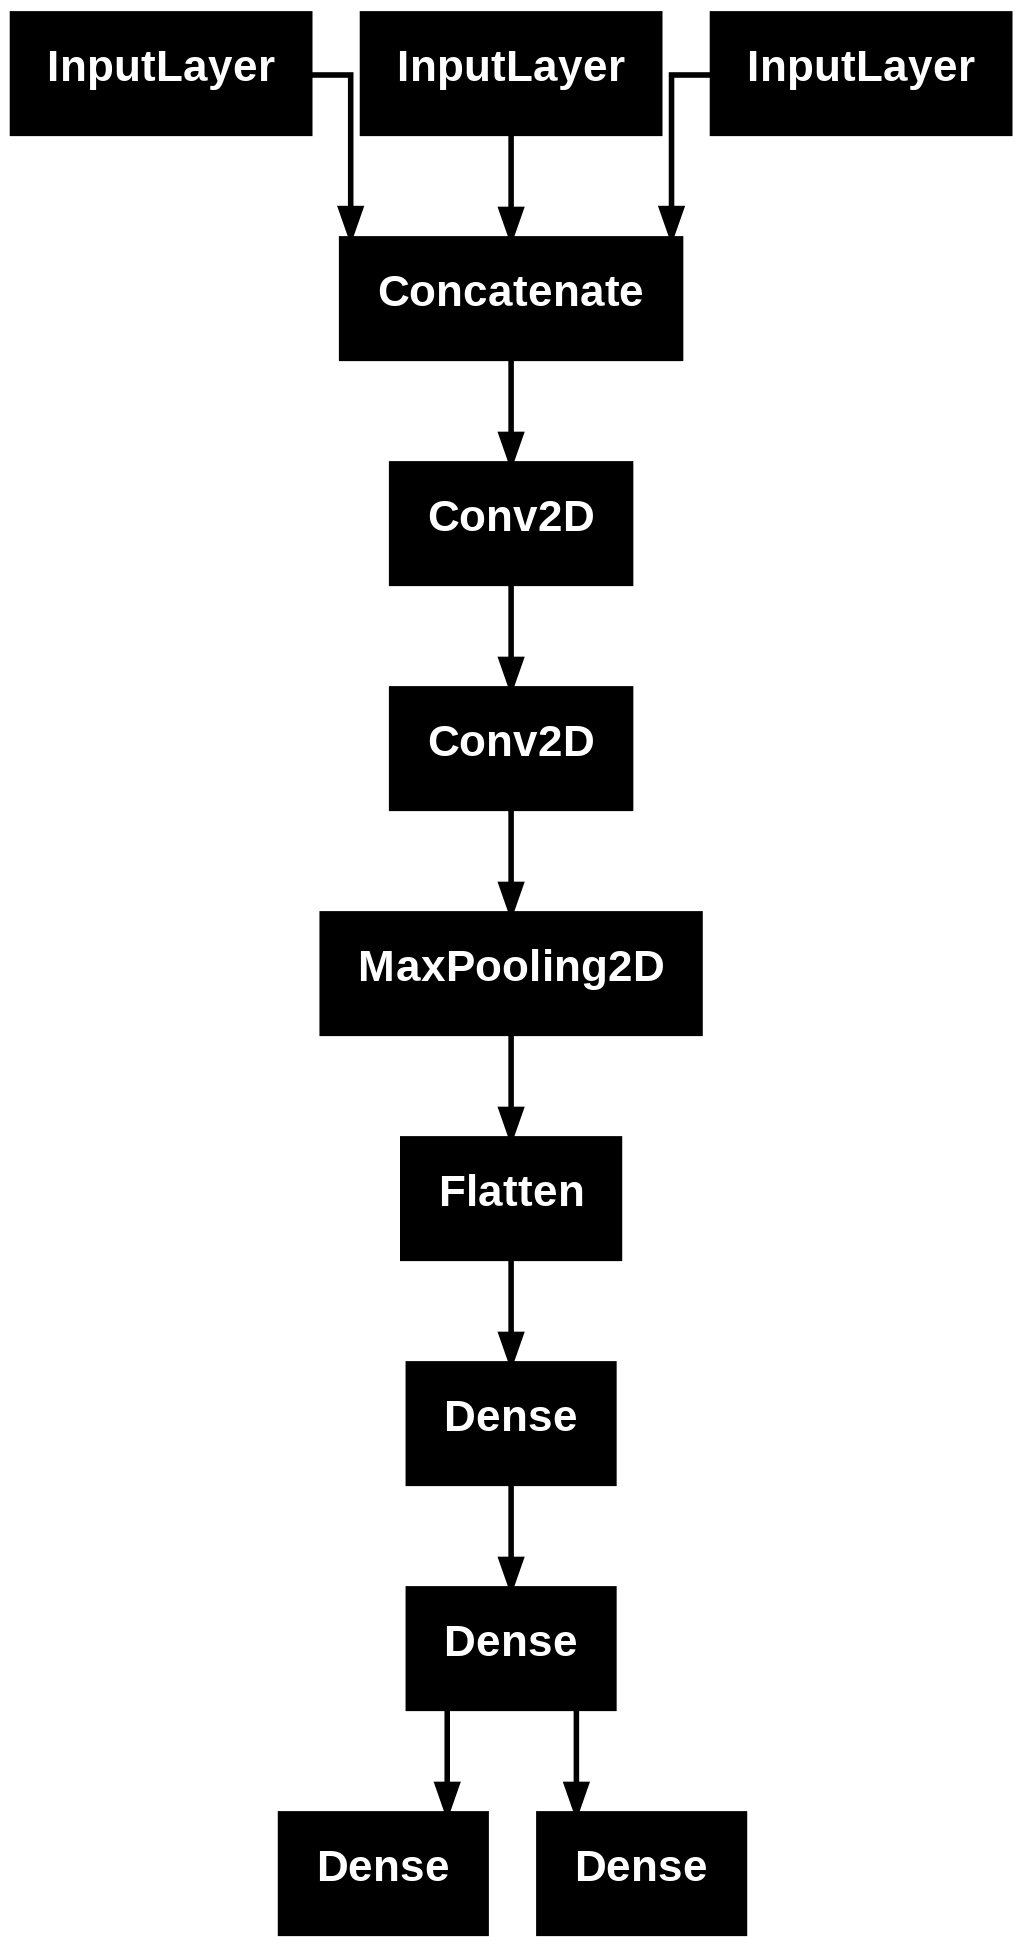

In [75]:
model.summary()
tf.keras.utils.plot_model(model)

In [76]:
model.compile(loss=["sparse_categorical_crossentropy", "binary_crossentropy"],
              optimizer="Adam",
              metrics=["accuracy","accuracy"])

In [77]:
history = model.fit([x_train, x_train2, x_train3], [y_train,y_train2] , epochs=10,batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.5867 - output1_accuracy: 0.8670 - output1_loss: 0.4144 - output2_accuracy: 0.9215 - output2_loss: 0.1723 - val_loss: 0.0940 - val_output1_accuracy: 0.9819 - val_output1_loss: 0.0605 - val_output2_accuracy: 0.9895 - val_output2_loss: 0.0333
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0715 - output1_accuracy: 0.9853 - output1_loss: 0.0471 - output2_accuracy: 0.9916 - output2_loss: 0.0244 - val_loss: 0.0933 - val_output1_accuracy: 0.9823 - val_output1_loss: 0.0596 - val_output2_accuracy: 0.9888 - val_output2_loss: 0.0334
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0423 - output1_accuracy: 0.9910 - output1_loss: 0.0281 - output2_accuracy: 0.9952 - output2_loss: 0.0142 - val_loss: 0.0962 - val_output1_accuracy: 0.9823 - val_output1_loss: 0.0666 - val_output2_accuracy: 0.9913 - val_output2_loss: 0.0294
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0272 - output1_accuracy: 0.993

In [78]:
yestA,yestB = model.predict([x_test, x_test2, x_test3])
print(yestA.shape,yestB.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10) (10000, 1)


In [79]:
idxs = np.random.randint(0, yestA.shape[0], 10)

y_pred1 = np.argmax(yestA, axis=1)
y_pred2 = np.round(yestB).astype(int)

for idx in idxs:
  if y_pred2[idx] == 0:
    text = "Impar"
  else:
    text = "Par"
  print(f"Etiquetas - Real: {y_test[idx]} ; Predicha: {y_pred1[idx]}; Binaria: {text}")

Etiquetas - Real: 4 ; Predicha: 4; Binaria: Par
Etiquetas - Real: 4 ; Predicha: 4; Binaria: Par
Etiquetas - Real: 2 ; Predicha: 2; Binaria: Par
Etiquetas - Real: 9 ; Predicha: 9; Binaria: Impar
Etiquetas - Real: 4 ; Predicha: 4; Binaria: Par
Etiquetas - Real: 7 ; Predicha: 7; Binaria: Impar
Etiquetas - Real: 9 ; Predicha: 9; Binaria: Impar
Etiquetas - Real: 8 ; Predicha: 8; Binaria: Par
Etiquetas - Real: 6 ; Predicha: 6; Binaria: Par
Etiquetas - Real: 7 ; Predicha: 7; Binaria: Impar


In [80]:
accurate = 0
accurate2 = 0
for i in range(len(yestA)):
  if y_test[i] == y_pred1[i]:
    accurate += 1
  if y_test2[i] == y_pred2[i]:
    accurate2 += 1
print(f"La precisión del modelo para clasificación numérica: {round(accurate/len(y_pred1),3)*100}%")
print(f"La precisión del modelo para clasificación binaria: {round(accurate2/len(y_pred2),3)*100}%")

La precisión del modelo para clasificación numérica: 98.5%
La precisión del modelo para clasificación binaria: 99.4%
